In [103]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint
import glob
import gc

In [104]:
# set base path to the directory containing the csv files of the dataset
dataset_base_path_parquet = r'D:/GIU/Semester 7/Bachelor Thesis/Datasets/CICIDS 2018/full cicids 2018/processed/newPARQUET'

In [105]:
parquet_files = glob.glob(os.path.join(dataset_base_path_parquet, '*.parquet'))

network_data = pd.concat((pd.read_parquet(f) for f in parquet_files))

In [106]:
network_data.shape

(15738470, 80)

In [107]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15738470 entries, 0 to 601380
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   dst_port           uint32 
 1   protocol           uint8  
 2   timestamp          object 
 3   flow_duration      int64  
 4   tot_fwd_pkts       uint32 
 5   tot_bwd_pkts       uint32 
 6   totlen_fwd_pkts    uint32 
 7   totlen_bwd_pkts    uint32 
 8   fwd_pkt_len_max    uint16 
 9   fwd_pkt_len_min    uint16 
 10  fwd_pkt_len_mean   float32
 11  fwd_pkt_len_std    float32
 12  bwd_pkt_len_max    uint16 
 13  bwd_pkt_len_min    uint16 
 14  bwd_pkt_len_mean   float32
 15  bwd_pkt_len_std    float32
 16  flow_byts_s        float64
 17  flow_pkts_s        float64
 18  flow_iat_mean      float32
 19  flow_iat_std       float32
 20  flow_iat_max       int64  
 21  flow_iat_min       int64  
 22  fwd_iat_tot        int64  
 23  fwd_iat_mean       float32
 24  fwd_iat_std        float32
 25  fwd_iat_max       

In [108]:
# check the number of values for labels
network_data['label'].value_counts()

Benign                      13385066
DDOS attack-HOIC              668461
DDoS attacks-LOIC-HTTP        576175
DoS attacks-Hulk              434873
Bot                           282310
Infilteration                 161059
SSH-Bruteforce                117322
DoS attacks-GoldenEye          41455
FTP-BruteForce                 39346
DoS attacks-SlowHTTPTest       19462
DoS attacks-Slowloris          10285
DDOS attack-LOIC-UDP            1730
Brute Force -Web                 609
Brute Force -XSS                 230
SQL Injection                     87
Name: label, dtype: int64

In [109]:
label_encoder = LabelEncoder()
network_data['label']= label_encoder.fit_transform(network_data['label'])
network_data['label'].unique()

array([ 0, 12,  1, 11, 14,  7, 10,  9,  8,  6,  5,  4,  2,  3, 13])

In [110]:
# check for encoded labels
network_data['label'].value_counts()

0     13385066
4       668461
6       576175
8       434873
1       282310
12      161059
14      117322
7        41455
11       39346
9        19462
10       10285
5         1730
2          609
3          230
13          87
Name: label, dtype: int64

In [111]:
network_data.shape

(15738470, 80)

In [112]:
network_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(network_data.drop("label", axis=1), network_data["label"], test_size=0.2, random_state=42)

training_data, testing_data = train_test_split(network_data, test_size=0.2, random_state=132, stratify=network_data.label)

In [114]:
target_train = training_data['label']
target_test = testing_data['label']
target_train.unique(), target_test.unique()

(array([ 0,  4,  8,  6,  1, 14, 12,  9,  7, 11, 10,  5,  2,  3, 13]),
 array([ 0,  1,  6, 11,  4, 14,  8, 12, 10,  9,  7,  3,  5,  2, 13]))

In [115]:
training_data.drop(columns = ["timestamp","label"], axis=1, inplace = True)
testing_data.drop(columns = ["timestamp","label"], axis=1, inplace = True)

In [116]:
print(training_data.shape)
print(testing_data.shape)
print(target_train.shape)
print(target_test.shape)

(12590776, 78)
(3147694, 78)
(12590776,)
(3147694,)


In [117]:
y_train = to_categorical(target_train, num_classes=15)
y_test = to_categorical(target_test, num_classes=15)

In [118]:
# %%time
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectFromModel

# sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
# sel.fit(X_train, y_train)

In [119]:
# selected_feat = X_train.columns[(sel.get_support())]
# print(selected_feat)

In [120]:
# len(selected_feat)

In [121]:
selected_feat = ['bwd_header_len', 'bwd_pkt_len_mean','bwd_pkt_len_std', 
       'dst_port', 'flow_duration', 'flow_iat_max','flow_iat_mean', 
       'flow_iat_min', 'flow_pkts_s', 'fwd_header_len',
       'fwd_iat_max', 'fwd_iat_mean', 'fwd_iat_min', 'fwd_iat_tot',
       'fwd_pkt_len_max', 'fwd_pkt_len_mean', 'fwd_pkt_len_std', 'fwd_pkts_s',
       'fwd_seg_size_avg', 'fwd_seg_size_min', 'init_fwd_win_byts',
       'pkt_size_avg', 'subflow_fwd_byts', 'totlen_fwd_pkts', 'tot_bwd_pkts']

In [122]:
X_train = training_data[selected_feat]
X_train.shape

(12590776, 25)

In [123]:
# X_train_NEW.info()

In [124]:
X_test = testing_data[selected_feat]
X_test.shape

(3147694, 25)

In [125]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12590776, 25)
(3147694, 25)
(12590776, 15)
(3147694, 15)


In [126]:
del network_data,training_data,testing_data,target_train,target_test
gc.collect()

19909

# XGBoost (XGB-15C)

In [55]:
# Import the necessary libraries
from xgboost import XGBClassifier

# Define the parameters
# n_estimators = 1900
# max_depth = 10
# reg_lambda = 4.8139
# min_samples_split = 254
# random_state = 5

# # Create the gradient boost classifier
# model3 = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, reg_lambda=reg_lambda,
#                       min_samples_split=min_samples_split, random_state=random_state)


# model3 = XGBClassifier(n_estimators = 2200,
#                         max_depth = 10,
#                         reg_lambda = 4.8139,
#                         min_samples_split = 254,
#                         random_state = 5, tree_method = 'hist',n_jobs = -1)

In [57]:
# %%time

# model3.fit(X_train, y_train)

[04:27:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Wall time: 6h 41min 21s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              min_samples_split=254, missing=nan, monotone_constraints='()',
              n_estimators=2200, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', ...)

In [58]:
# import pickle

# with open('D:/GIU/Semester 7/Bachelor Thesis/Project Code/models/XGB_V5.3.15.pkl','wb') as file:
#     pickle.dump(model3,file)

In [96]:
import pickle

with open('D:/GIU/Semester 7/Bachelor Thesis/Project Code/models/XGB_V5.3.15.pkl','rb') as f:
    model3 = pickle.load(f)

In [97]:
%%time
Y_test_pred3 = model3.predict(X_test)

Wall time: 3min 30s


In [98]:
test_accuracy = model3.score(X_test,y_test)
print("Test score is:",test_accuracy)

Test score is: 0.9895193115976331


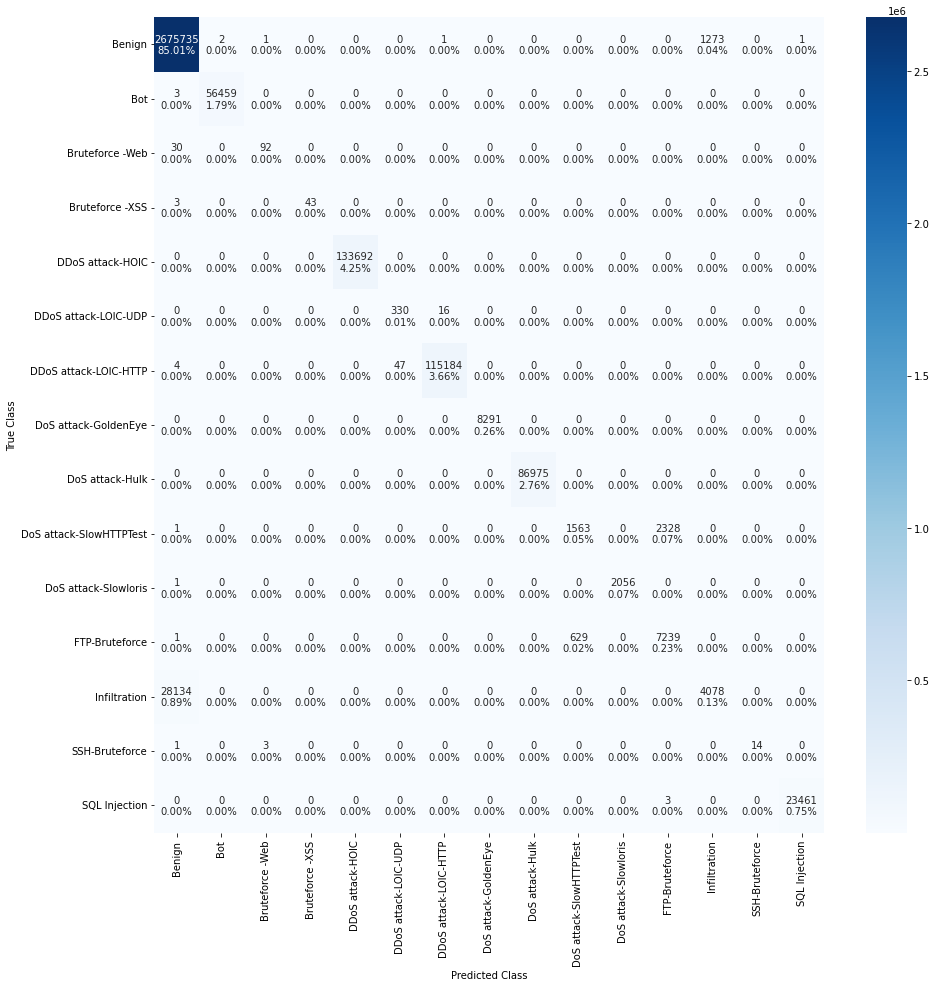

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
#model = tf.keras.models.load_model('/'+model_name+'.h5')

y_pred = Y_test_pred3

y_pred_cm  = np.argmax(y_pred, axis=1)
y_test_cm  = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_cm, y_pred_cm)

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(15,15)


label = ['Benign','Bot','Bruteforce -Web','Bruteforce -XSS','DDoS attack-HOIC','DDoS attack-LOIC-UDP','DDoS attack-LOIC-HTTP'
        ,'DoS attack-GoldenEye','DoS attack-Hulk','DoS attack-SlowHTTPTest','DoS attack-Slowloris','FTP-Bruteforce'
         ,'Infiltration','SSH-Bruteforce','SQL Injection']

plt.figure(figsize=(15,15))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
# plt.title('Confusion Matrix for'+ modelName+' model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
# plt.savefig('./'+modelName+'_CM.png')
plt.show()

In [100]:
from sklearn.metrics import classification_report



print(classification_report(y_test_cm, y_pred_cm, target_names= label,digits=5))
                            
# accuracy = model3.score(X_test,y_test)
accuracy = test_accuracy
print("Test: accuracy = %f  " % (accuracy))

                         precision    recall  f1-score   support

                 Benign    0.98958   0.99952   0.99453   2677013
                    Bot    0.99996   0.99995   0.99996     56462
        Bruteforce -Web    0.95833   0.75410   0.84404       122
        Bruteforce -XSS    1.00000   0.93478   0.96629        46
       DDoS attack-HOIC    1.00000   1.00000   1.00000    133692
   DDoS attack-LOIC-UDP    0.87533   0.95376   0.91286       346
  DDoS attack-LOIC-HTTP    0.99985   0.99956   0.99970    115235
   DoS attack-GoldenEye    1.00000   1.00000   1.00000      8291
        DoS attack-Hulk    1.00000   1.00000   1.00000     86975
DoS attack-SlowHTTPTest    0.71305   0.40159   0.51381      3892
   DoS attack-Slowloris    1.00000   0.99951   0.99976      2057
         FTP-Bruteforce    0.75643   0.91994   0.83021      7869
           Infiltration    0.76210   0.12660   0.21713     32212
         SSH-Bruteforce    1.00000   0.77778   0.87500        18
          SQL Injection 

# Random Forest (RF-15C)

In [56]:
%%time
#RANDOM FOREST
model3 = RandomForestClassifier(n_estimators=150,n_jobs=-1)
model3.fit(X_train, y_train)

Wall time: 16h 6min 42s


RandomForestClassifier(n_estimators=150, n_jobs=-1)

In [ ]:
# import pickle

# with open('D:/GIU/Semester 7/Bachelor Thesis/Project Code/models/RF_V5.3.15.pkl','wb') as f:
#     pickle.dump(model3,f)

In [ ]:
import pickle

with open('D:/GIU/Semester 7/Bachelor Thesis/Project Code/models/RF_V5.3.15.pkl','rb') as f:
    model3 = pickle.load(f)

In [88]:
%%time
Y_test_pred3 = model3.predict(X_test)

Wall time: 6min 49s


In [89]:
test_accuracy = model3.score(X_test,y_test)
print("Test score is:",test_accuracy)

Test score is: 0.9923957030130629


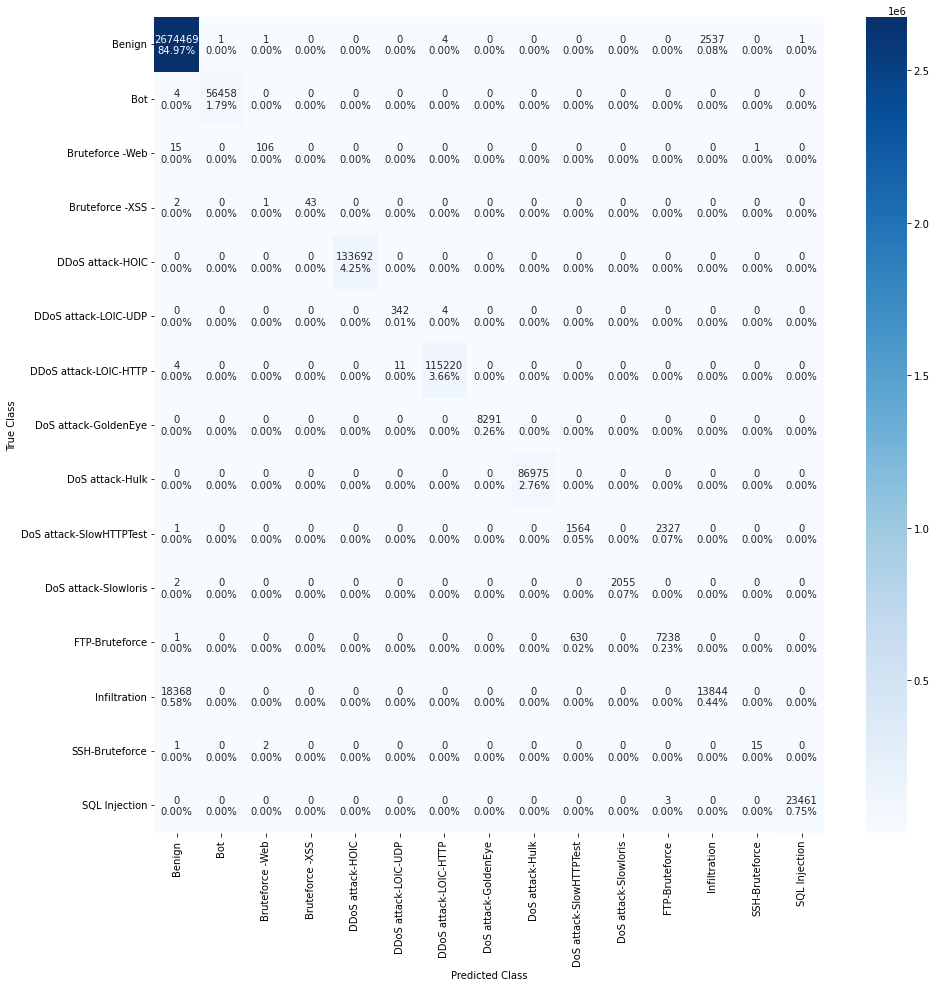

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
#model = tf.keras.models.load_model('/'+model_name+'.h5')

y_pred = model3.predict(X_test)

y_pred_cm  = np.argmax(y_pred, axis=1)
y_test_cm  = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_cm, y_pred_cm)

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(15,15)


label = ['Benign','Bot','Bruteforce -Web','Bruteforce -XSS','DDoS attack-HOIC','DDoS attack-LOIC-UDP','DDoS attack-LOIC-HTTP'
        ,'DoS attack-GoldenEye','DoS attack-Hulk','DoS attack-SlowHTTPTest','DoS attack-Slowloris','FTP-Bruteforce'
         ,'Infiltration','SSH-Bruteforce','SQL Injection']

plt.figure(figsize=(15,15))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
# plt.title('Confusion Matrix for'+ modelName+' model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
# plt.savefig('./'+modelName+'_CM.png')
plt.show()

In [91]:
from sklearn.metrics import classification_report



print(classification_report(y_test_cm, y_pred_cm, target_names= label,digits=5))
                            
# accuracy = model3.score(X_test,y_test)
accuracy = test_accuracy
print("Test: accuracy = %f  " % (accuracy))

                         precision    recall  f1-score   support

                 Benign    0.99317   0.99905   0.99610   2677013
                    Bot    0.99998   0.99993   0.99996     56462
        Bruteforce -Web    0.96364   0.86885   0.91379       122
        Bruteforce -XSS    1.00000   0.93478   0.96629        46
       DDoS attack-HOIC    1.00000   1.00000   1.00000    133692
   DDoS attack-LOIC-UDP    0.96884   0.98844   0.97854       346
  DDoS attack-LOIC-HTTP    0.99993   0.99987   0.99990    115235
   DoS attack-GoldenEye    1.00000   1.00000   1.00000      8291
        DoS attack-Hulk    1.00000   1.00000   1.00000     86975
DoS attack-SlowHTTPTest    0.71285   0.40185   0.51397      3892
   DoS attack-Slowloris    1.00000   0.99903   0.99951      2057
         FTP-Bruteforce    0.75648   0.91981   0.83019      7869
           Infiltration    0.84513   0.42978   0.56979     32212
         SSH-Bruteforce    0.93750   0.83333   0.88235        18
          SQL Injection 

# CNN (CNN-15C)

In [43]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scalar1 = scaler.fit_transform(X_train)
scalar2 = scaler.fit_transform(X_test)

X_train = pd.DataFrame(scalar1)
X_test = pd.DataFrame(scalar2)

X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.013725,-0.356310,-0.098075,-0.482964,-0.014276,-0.001970,-0.010421,-0.003703,-0.151453,-0.013837,...,-0.454923,-0.208987,-0.135106,-0.454923,0.348404,-0.021660,-0.472490,-0.017332,-0.017332,-0.015222
1,0.041824,1.733210,1.905122,-0.463823,0.143288,0.083071,-0.002315,-0.003703,-0.151458,0.005449,...,7.522220,3.768550,-0.135109,7.522220,0.348404,-0.021660,3.396599,0.138258,0.138258,0.040187
2,-0.042116,-0.705902,-0.658834,-0.061106,-0.026017,-0.010582,-0.013530,-0.003703,-0.131966,-0.018016,...,-0.854191,-0.621432,-0.114136,-0.854191,0.348404,-0.509855,-0.849908,-0.019208,-0.019208,-0.039848
3,0.047996,2.631761,2.576039,-0.463823,0.221840,0.081115,0.002889,-0.003703,-0.151459,0.003842,...,0.229185,0.268309,-0.135109,0.229185,0.348404,-0.021660,1.913591,-0.000115,-0.000115,0.046344
4,-0.042116,-0.705902,-0.658834,2.248676,-0.026018,-0.010583,-0.013532,-0.003703,0.054309,-0.018016,...,-0.598989,-0.435021,0.086282,-0.598989,0.348404,1.637135,-0.707225,-0.018608,-0.018608,-0.039848


In [44]:
# reshape the data for CNN
X_train = X_train.values
X_test = X_test.values


X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((12590776, 25, 1), (3147694, 25, 1))

In [ ]:
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [ ]:
from keras.layers import Dense, Dropout, Activation, Lambda

# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(32,3,activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(X_train.shape[1], 1)))
    model.add(Conv1D(32,3,activation='relu',padding='same',kernel_initializer='he_uniform'))
    model.add(MaxPooling1D(pool_size=2,strides=2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Conv1D(64,3,activation='relu',padding='same',kernel_initializer='he_uniform'))
    model.add(Conv1D(64,3,activation='relu',padding='same',kernel_initializer='he_uniform')) 
    model.add(MaxPooling1D(pool_size=2,strides=2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())    

    model.add(Conv1D(64,3,activation='relu',padding='same',kernel_initializer='he_uniform'))
    model.add(Conv1D(64,3,activation='relu',padding='same',kernel_initializer='he_uniform')) 
    model.add(MaxPooling1D(pool_size=2,strides=2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())    

    model.add(Flatten())
    model.add(Dense(32,activation='relu'))
    model.add(Dense(15,activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [47]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 25, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 32)            0         
                                                                 
 batch_normalization (BatchN  (None, 12, 32)           128       
 ormalization)                                                   
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 64)            6

In [49]:
batch_size = 4096
logger = CSVLogger('logs.csv', append=True)
his = model.fit(X_train, y_train, epochs=25#
                , batch_size=batch_size, 
          validation_data=(X_test, y_test), callbacks=[logger])

Epoch 1/25
3074/3074 [==============================] - 783s 253ms/step - loss: 0.0786 - accuracy: 0.9812 - val_loss: 0.0958 - val_accuracy: 0.9700
Epoch 2/25
3074/3074 [==============================] - 780s 254ms/step - loss: 0.0571 - accuracy: 0.9867 - val_loss: 0.0809 - val_accuracy: 0.9719
Epoch 3/25
3074/3074 [==============================] - 783s 255ms/step - loss: 0.0549 - accuracy: 0.9872 - val_loss: 0.0736 - val_accuracy: 0.9809
Epoch 4/25
3074/3074 [==============================] - 781s 254ms/step - loss: 0.0541 - accuracy: 0.9874 - val_loss: 0.0818 - val_accuracy: 0.9812
Epoch 5/25
3074/3074 [==============================] - 784s 255ms/step - loss: 0.0536 - accuracy: 0.9876 - val_loss: 0.1497 - val_accuracy: 0.9675
Epoch 6/25
3074/3074 [==============================] - 782s 254ms/step - loss: 0.0533 - accuracy: 0.9876 - val_loss: 0.0945 - val_accuracy: 0.9784
Epoch 7/25
3074/3074 [==============================] - 783s 255ms/step - loss: 0.0528 - accuracy: 0.9877 - val_

In [ ]:
model.save("D:/GIU/Semester 7/Bachelor Thesis/Project Code/models/CNN_V5.3.15.h5")

In [ ]:
from keras.models import load_model


loaded_model = load_model('D:/GIU/Semester 7/Bachelor Thesis/Project Code/models/CNN_V5.3.15.h5')

98366/98366 [==============================] - 203s 2ms/step


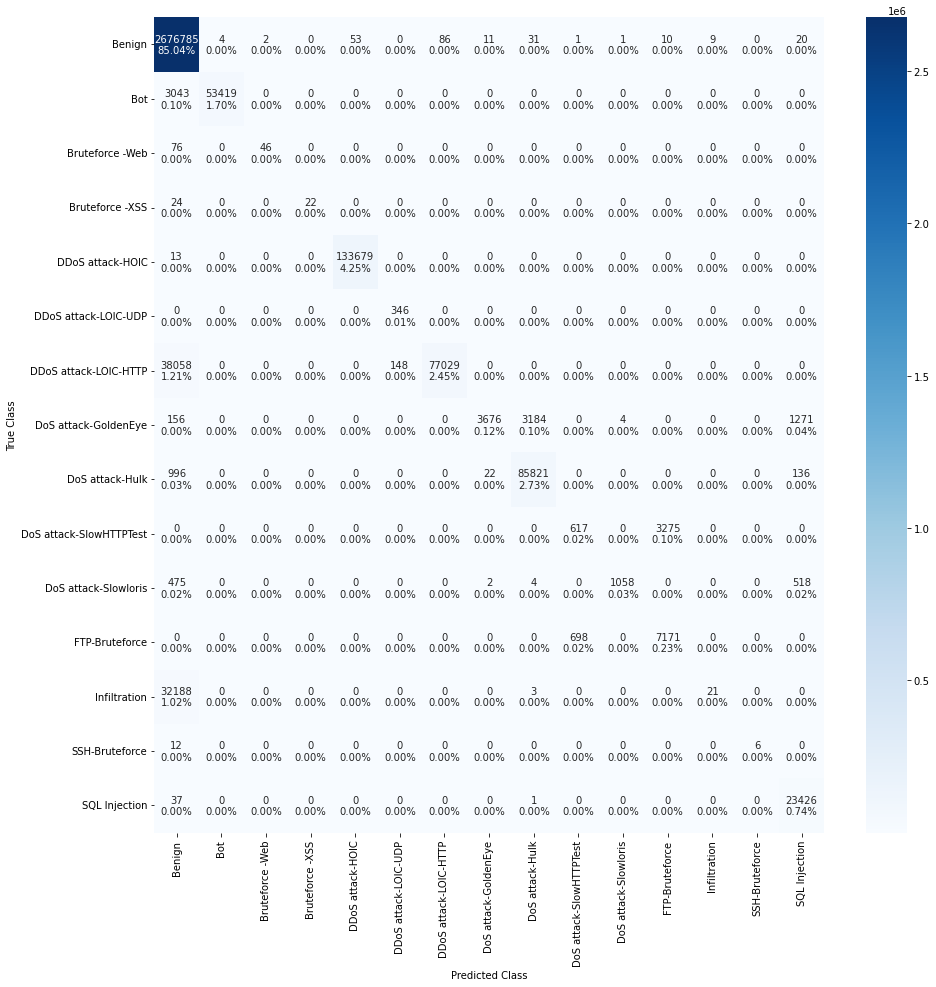

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
#model = tf.keras.models.load_model('/'+model_name+'.h5')

y_pred = model.predict(X_test)

y_pred_cm  = np.argmax(y_pred, axis=1)
y_test_cm  = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(15,15)

label = ['Benign','Bot','Bruteforce -Web','Bruteforce -XSS','DDoS attack-HOIC','DDoS attack-LOIC-UDP','DDoS attack-LOIC-HTTP'
        ,'DoS attack-GoldenEye','DoS attack-Hulk','DoS attack-SlowHTTPTest','DoS attack-Slowloris','FTP-Bruteforce'
         ,'Infiltration','SSH-Bruteforce','SQL Injection']

plt.figure(figsize=(15,15))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
# plt.title('Confusion Matrix for'+ modelName+' model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
# plt.savefig('./'+modelName+'_CM.png')
plt.show()

In [52]:
from sklearn.metrics import classification_report



print(classification_report(y_test_cm, y_pred_cm, target_names= label,digits=5))
                            
loss, accuracy = model.evaluate(X_test,y_test, verbose = 1)
print("Test: accuracy = %f ; loss = %f " % (accuracy,loss))

                         precision    recall  f1-score   support

                 Benign    0.97272   0.99991   0.98613   2677013
                    Bot    0.99993   0.94611   0.97227     56462
        Bruteforce -Web    0.95833   0.37705   0.54118       122
        Bruteforce -XSS    1.00000   0.47826   0.64706        46
       DDoS attack-HOIC    0.99960   0.99990   0.99975    133692
   DDoS attack-LOIC-UDP    0.70040   1.00000   0.82381       346
  DDoS attack-LOIC-HTTP    0.99888   0.66845   0.80093    115235
   DoS attack-GoldenEye    0.99057   0.44337   0.61256      8291
        DoS attack-Hulk    0.96380   0.98673   0.97513     86975
DoS attack-SlowHTTPTest    0.46884   0.15853   0.23694      3892
   DoS attack-Slowloris    0.99530   0.51434   0.67821      2057
         FTP-Bruteforce    0.68583   0.91130   0.78265      7869
           Infiltration    0.70000   0.00065   0.00130     32212
         SSH-Bruteforce    1.00000   0.33333   0.50000        18
          SQL Injection 

# DNN (DNN-15C)

In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scalar1 = scaler.fit_transform(X_train)
scalar2 = scaler.fit_transform(X_test)

X_train = pd.DataFrame(scalar1)
X_test = pd.DataFrame(scalar2)

X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.010166,-0.025883,0.285490,2.416128,-0.014865,-0.004178,-0.011130,-0.003372,-0.151512,-0.007688,...,2.217267,2.933180,-0.135126,2.217267,2.027363,-0.512054,0.612482,-0.001144,-0.001144,-0.021574
1,-0.039929,-0.426482,-0.658303,-0.484362,-0.022809,-0.010612,-0.013520,-0.003371,-0.117961,-0.020581,...,-0.358991,-0.621088,-0.117079,-0.358991,-1.330466,-0.525588,-0.361393,-0.018563,-0.018563,-0.033947
2,-0.013887,-0.355522,-0.098043,-0.482938,-0.012282,-0.001865,-0.010353,-0.003372,-0.151514,-0.013812,...,-0.453344,-0.208833,-0.135128,-0.453344,0.348449,-0.021583,-0.471642,-0.017274,-0.017274,-0.015388
3,0.134927,3.523358,2.561354,-0.463795,0.199496,0.082353,-0.002877,-0.003372,-0.151519,0.010041,...,-0.025014,0.049773,-0.135131,-0.025014,0.348449,-0.021583,3.328304,-0.002664,-0.002664,0.133081
4,0.034478,0.250510,1.125462,-0.308431,-0.016394,-0.009315,-0.012845,-0.003372,-0.151492,-0.002530,...,2.135221,1.533999,-0.135115,2.135221,0.348449,3.426294,0.719231,0.019394,0.019394,0.021729


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scalar1 = scaler.fit_transform(X_train)
scalar2 = scaler.fit_transform(X_test)

X_train = pd.DataFrame(scalar1)
X_test = pd.DataFrame(scalar2)

X_train.head()

In [ ]:
import tensorflow as tf

def model():

    # Define the model
    model = tf.keras.Sequential()

    # Add the layers
    model.add(tf.keras.layers.Dense(300, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.Dropout(0.22))
    model.add(tf.keras.layers.Dense(300, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.22))
    model.add(tf.keras.layers.Dense(300, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.22))
    model.add(tf.keras.layers.Dense(300, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.22))
    model.add(tf.keras.layers.Dense(300, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.22))
    model.add(tf.keras.layers.Dense(300, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.22))
    model.add(tf.keras.layers.Dense(300, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.22))
    model.add(tf.keras.layers.Dense(300, activation='relu'))#
    model.add(tf.keras.layers.Dropout(0.22))#
    model.add(tf.keras.layers.Dense(300, activation='relu'))#
    model.add(tf.keras.layers.Dropout(0.22))#
    model.add(tf.keras.layers.Dense(300, activation='relu'))#
    model.add(tf.keras.layers.Dropout(0.22))#
    model.add(tf.keras.layers.Dense(15, activation='softmax'))

    # Compile the model
#     optimizer = tf.keras.optimizers.Adam(learning_rate=0.00061)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model



In [57]:
model = model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 300)               7800      
                                                                 
 dropout_21 (Dropout)        (None, 300)               0         
                                                                 
 dense_25 (Dense)            (None, 300)               90300     
                                                                 
 dropout_22 (Dropout)        (None, 300)               0         
                                                                 
 dense_26 (Dense)            (None, 300)               90300     
                                                                 
 dropout_23 (Dropout)        (None, 300)               0         
                                                                 
 dense_27 (Dense)            (None, 300)              

In [59]:
%%time
# Fit the model to the training data
logger = CSVLogger('logs.csv', append=True)

his = model.fit(X_train, y_train, batch_size=512, epochs=50, validation_data=(X_test, y_test),callbacks=[logger])

Epoch 1/50
24592/24592 [==============================] - 784s 32ms/step - loss: 0.0694 - accuracy: 0.9845 - val_loss: 0.7296 - val_accuracy: 0.9016
Epoch 2/50
24592/24592 [==============================] - 776s 32ms/step - loss: 0.0658 - accuracy: 0.9860 - val_loss: 0.9117 - val_accuracy: 0.9100
Epoch 3/50
24592/24592 [==============================] - 660s 27ms/step - loss: 0.0695 - accuracy: 0.9857 - val_loss: 0.9158 - val_accuracy: 0.9011
Epoch 4/50
24592/24592 [==============================] - 656s 27ms/step - loss: 0.0748 - accuracy: 0.9851 - val_loss: 0.5916 - val_accuracy: 0.9189
Epoch 5/50
24592/24592 [==============================] - 662s 27ms/step - loss: 0.0716 - accuracy: 0.9854 - val_loss: 1.9044 - val_accuracy: 0.8969
Epoch 6/50
24592/24592 [==============================] - 672s 27ms/step - loss: 0.0772 - accuracy: 0.9847 - val_loss: 0.8048 - val_accuracy: 0.9157
Epoch 7/50
24592/24592 [==============================] - 684s 28ms/step - loss: 0.0812 - accuracy: 0.9842

In [ ]:
model.save("D:/GIU/Semester 7/Bachelor Thesis/Project Code/models/DNN_V5.3.15.h5")

In [ ]:
from keras.models import load_model


model = load_model('D:/GIU/Semester 7/Bachelor Thesis/Project Code/models/DNN_V5.3.15.h5')

98366/98366 [==============================] - 271s 3ms/step


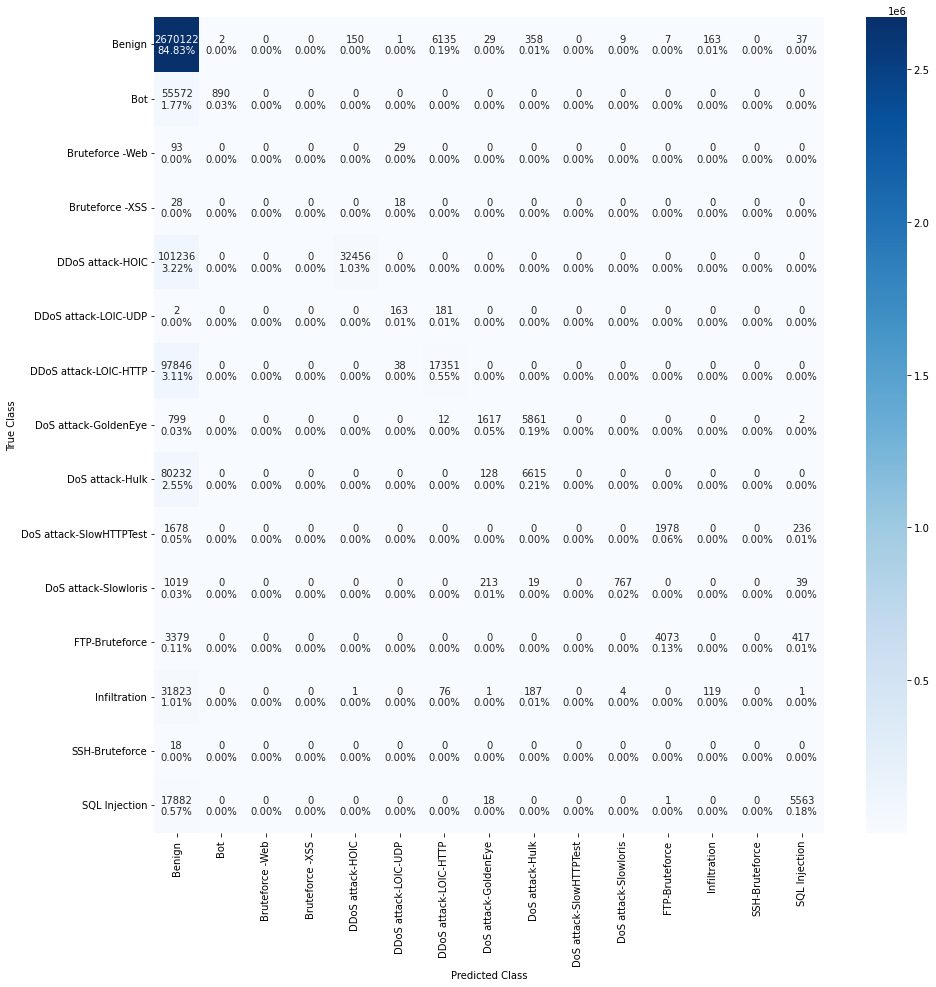

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
#model = tf.keras.models.load_model('/'+model_name+'.h5')

y_pred = model.predict(X_test)

y_pred_cm  = np.argmax(y_pred, axis=1)
y_test_cm  = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(15,15)

label = ['Benign','Bot','Bruteforce -Web','Bruteforce -XSS','DDoS attack-HOIC','DDoS attack-LOIC-UDP','DDoS attack-LOIC-HTTP'
        ,'DoS attack-GoldenEye','DoS attack-Hulk','DoS attack-SlowHTTPTest','DoS attack-Slowloris','FTP-Bruteforce'
         ,'Infiltration','SSH-Bruteforce','SQL Injection']

plt.figure(figsize=(15,15))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
# plt.title('Confusion Matrix for'+ modelName+' model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
# plt.savefig('./'+modelName+'_CM.png')
plt.show()

In [153]:
from sklearn.metrics import classification_report



print(classification_report(y_test_cm, y_pred_cm, target_names= label,digits=5))
                            
loss, accuracy = model.evaluate(X_test,y_test, verbose = 1)
print("Test: accuracy = %f ; loss = %f " % (accuracy,loss))

C:\Users\hashe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hashe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hashe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                         precision    recall  f1-score   support

                 Benign    0.87210   0.99743   0.93056   2677013
                    Bot    0.99776   0.01576   0.03104     56462
        Bruteforce -Web    0.00000   0.00000   0.00000       122
        Bruteforce -XSS    0.00000   0.00000   0.00000        46
       DDoS attack-HOIC    0.99537   0.24277   0.39033    133692
   DDoS attack-LOIC-UDP    0.65462   0.47110   0.54790       346
  DDoS attack-LOIC-HTTP    0.73041   0.15057   0.24967    115235
   DoS attack-GoldenEye    0.80608   0.19503   0.31407      8291
        DoS attack-Hulk    0.50729   0.07606   0.13228     86975
DoS attack-SlowHTTPTest    0.00000   0.00000   0.00000      3892
   DoS attack-Slowloris    0.98333   0.37287   0.54071      2057
         FTP-Bruteforce    0.67222   0.51760   0.58487      7869
           Infiltration    0.42199   0.00369   0.00732     32212
         SSH-Bruteforce    0.00000   0.00000   0.00000        18
          SQL Injection 